In [1]:
pip install matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
x_train=np.loadtxt('input.csv',delimiter=',')
y_train=np.loadtxt('labels.csv',delimiter=',')

x_test=np.loadtxt('input_test.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [4]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)
x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

x_train=x_train/255.0
x_test=x_test/255.0

datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
    
)

In [5]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",x_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of x_test:",x_test.shape)

shape of x_train: (2000, 100, 100, 3)
shape of y_train: (2000, 100, 100, 3)
shape of x_test: (400, 100, 100, 3)
shape of x_test: (400, 100, 100, 3)


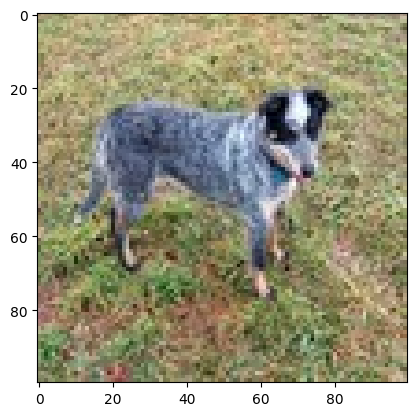

In [6]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\Karegam Snehitha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

model = Sequential()

model.add(Input(shape=(100, 100, 3)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
pip install scipy



[notice] A new release of pip available: 22.2.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          epochs=10,
          validation_data=(x_test, y_test),
          verbose=1)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 433ms/step - accuracy: 0.5025 - loss: 0.7161 - val_accuracy: 0.4900 - val_loss: 0.6930
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 433ms/step - accuracy: 0.4940 - loss: 0.6932 - val_accuracy: 0.5200 - val_loss: 0.6927
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 437ms/step - accuracy: 0.5100 - loss: 0.6935 - val_accuracy: 0.5050 - val_loss: 0.6901
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 421ms/step - accuracy: 0.4975 - loss: 0.6939 - val_accuracy: 0.4975 - val_loss: 0.6927
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 415ms/step - accuracy: 0.5445 - loss: 0.6913 - val_accuracy: 0.5000 - val_loss: 0.6853
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 429ms/step - accuracy: 0.5405 - loss: 0.6864 - val_accuracy: 0.5700 - val_loss: 0.6853
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 416ms/step - accuracy: 0.5550 - loss: 0.6841 - val_accuracy: 0.5925 - val_loss: 0.6812
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 332ms/step - accuracy: 0.5475 - loss: 0.6815 - val_accu

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if (y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)

In [ ]:
model.save('model.h5')
print('Saved model to model.h5')

In [ ]:
cheese=7
crust=8
spice=6
w_cheese=0.5
w_crust=0.4
w_spice=0.2
bias=1
z=cheese*w_cheese + crust*w_crust + spice*w_spice + bias
if z>0:
    output=z
else:
    output=0
print("pzza likin score:",output)

pzza likin score: 8.9
